# Ball Challenge

In [9]:
import matplotlib.pyplot as plt
from torch import nn

from ballchallenge.position_prediction import PositionPrediction

plt.style.use("seaborn-v0_8-whitegrid")



experiment = PositionPrediction()

## Load Training and Test Data

In [10]:

experiment.load_dataset()

print("Train Samples:", len(experiment.train_set))
print("Test Samples:", len(experiment.test_set))

print("Sample Shape:", experiment.input_shape)

Train Samples: 43
Test Samples: 14
Sample Shape: (3, 250)


## Create Model

In [11]:
def conv(in_channels, out_channels, kernel_size):
    return nn.Sequential(nn.Conv1d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size),
                         nn.BatchNorm1d(num_features=out_channels),
                         nn.Identity())

def create_model():
    return nn.Sequential(
    conv(3, 1, kernel_size=64),
    conv(1, 1, kernel_size=26),
    # conv(2, 2, kernel_size=13),
    conv(1, 1, kernel_size=13),
    nn.Flatten(),
    # nn.Linear(in_features=150, out_features=16),
    nn.Linear(in_features=150, out_features=2),
)




## Train Model

In [12]:
experiment.model = create_model()
experiment.train(epochs=900, stop_early=True)

epoch: 0, train loss: 0.7150554656982422, test loss: 0.4168546141258308
epoch: 1, train loss: 0.7056971192359924, test loss: 0.4181823187640735
epoch: 2, train loss: 0.6965311765670776, test loss: 0.41938370040484835
epoch: 3, train loss: 0.6875607371330261, test loss: 0.4205638952553272
epoch: 4, train loss: 0.6787874698638916, test loss: 0.4216991072254522
epoch: 5, train loss: 0.670210599899292, test loss: 0.4228086162890707
epoch: 6, train loss: 0.6618281602859497, test loss: 0.4238863949264799
epoch: 7, train loss: 0.6536376476287842, test loss: 0.42491328716278076
epoch: 8, train loss: 0.6456367373466492, test loss: 0.425950288772583
epoch: 9, train loss: 0.6378224492073059, test loss: 0.42703213755573544
epoch: 10, train loss: 0.6301910281181335, test loss: 0.4281454650419099
epoch: 11, train loss: 0.6227389574050903, test loss: 0.429348636418581
epoch: 12, train loss: 0.6154621243476868, test loss: 0.43062003382614683
epoch: 13, train loss: 0.6083558797836304, test loss: 0.4319

## Training History and Distance from predicted positions

mean distance between predicted and actual position  2.157518744468689  meters


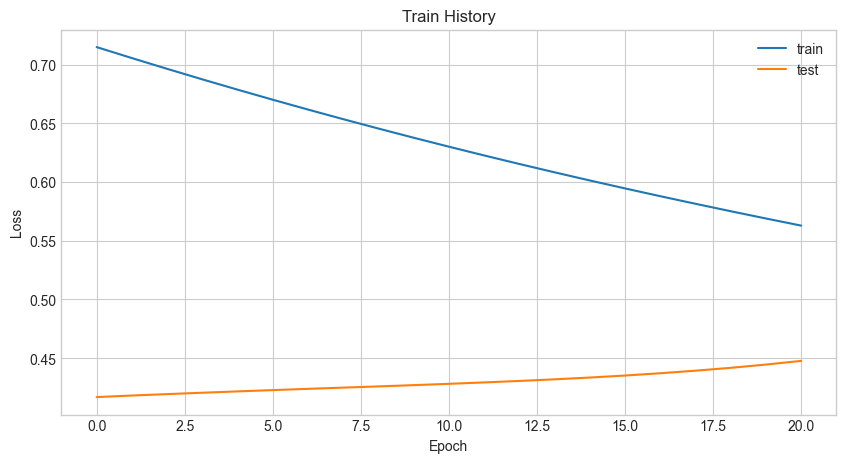

In [13]:
experiment.plot_history()
print("mean distance between predicted and actual position ", experiment.get_mean_and_var_distance_for_test()[0], " meters")